决策树：就是一系列的if-then语句，可用于分类、回归问题。

构建决策树的步骤：
1. 特征选择：熵、基尼系数（针对分类）、方差（针对回归）
2. 决策树生成：ID3（信息增益）、C4.5（信息增益比）、CART（回归生成树用平方误差最小化策略，分类生成树采用基尼指数最小化策略）
3. 决策树剪枝

___
**回归决策树**：**sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)**
> 1. criterion：字符串，指定切分质量的评价标准。mse表示均方误差。
> 2. splitter：字符串，指定切分原则。
    - best：选择最优的切分
    - random：随机切分
> 3. max_depth：树的最大深度。决策树的深度对应树的复杂度。
    - None：树的深度不限，直到叶子中包含小于min_sample_split个样本点。
> 4. min_samples_split：每个内部节点包含的最少的样本数。
> 5. min_samples_leaf：每个叶节点包含的最少的样本数。
> 6. min_weight_fraction_leaf：叶节点中样本的最小权重系数。
> 7. max_features：寻找best split时考虑的特征数量。
    - 整数：每次切分只考虑max_features个特征。
    - 浮点数：max_features * n_features
    - auto 或 None：n_features
    - sqrt：sqrt(n_features)
    - log2：log2(n_features)
> 8. max_leaf_nodes：叶节点的最大数量。
    - None：叶节点数量不限
    - 整数：忽略max_depth
> 9. min_impurity_decrease
> 10. min_impurity_split
> 11. presort：布尔值，是否要提前排序数据从而加速寻找最优切分的过程。

属性：
> 1. feature_importances_：特征的重要程度。
> 2. max_features_：max_features的推断值
> 3. n_features_：执行fit后，特征的数量
> 4. n_outputs_：执行fit后，输出的数量
> 5. tree_：Tree对象，即底层的决策树。

方法：
> 1. fit(X, y[, sample_weight, check_input, ...])
> 2. predict(X[, check_input])
> 3. score(X, y[, sample_weight])

In [14]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
def create_data(n):
    """
    描述：
        y是sin(x)，每隔5个点添加一个随机噪声
    参数：
        n：数据集容量
    """
    np.random.seed(0)
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num = (int)(n/5)
    y[::5] += 3 * (0.5 - np.random.rand(noise_num))
    return train_test_split(X, y, test_size=0.25, random_state=1)

Training score: 0.517108
Testing score: 0.527412


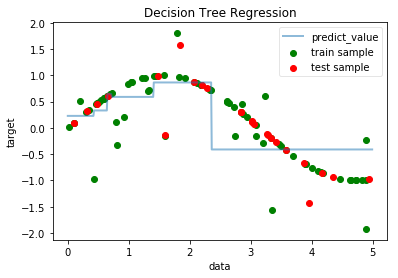

In [12]:
def test_DecisionTreeRegressor(*data):
    X_train, X_test, y_train, y_test = data
    regr = DecisionTreeRegressor(splitter='random', max_depth=3)
    regr.fit(X_train, y_train)
    print("Training score: %f" % regr.score(X_train, y_train))
    print("Testing score: %f" % regr.score(X_test, y_test))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label='train sample', c='g')
    ax.scatter(X_test, y_test, label='test sample', c='r')
    ax.plot(X, Y, label='predict_value', linewidth=2, alpha=0.5)
    ax.set_xlabel('data')
    ax.set_ylabel('target')
    ax.set_title('Decision Tree Regression')
    ax.legend(framealpha=0.5)
    plt.show()
    
X_train, X_test, y_train, y_test = create_data(100)
test_DecisionTreeRegressor(X_train, X_test, y_train, y_test)

_____
**分类决策树**：**sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)**
> 1. criterion：字符串，指定切分质量的评价准则。
    - gini：Gini系数
    - entropy：熵
> 2. class_weight：字典、balanced、或None，指定了分类的权重。
    - 字典形式为：{class_label: weight}。
    - balanced：分类的权重是样本中各分类出现的频率的反比。
    - None：每个分类的权重都为1。
    
属性：
> 1. classes_：分类的标签值。
> 2. feature_importances_：给出特征的重要程度。
> 3. max_features_：max_features的推断值。
> 4. n_classes_：给出分类的数量。
> 5. n_features_：执行fit后，特征的数量。
> 6. n_outputs_：执行fit后，输出的数量。
> 7. tree_：Tree对象，即底层的决策树。

方法：
> 1. fit(X, y[, sample_weight, check_input, ...])
> 2. predict(X[, check_input])
> 3. predict_log_proba(X)：返回数组，其元素依次为X预测为各个类别的概率的对数值。
> 4. predict_proba(X)
> 3. score(X, y[, sample_weight])

In [15]:
def load_data():
    iris = datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

In [23]:
def test_DecisionTreeClassifier(*data):
    X_train, X_test, y_train, y_test = data
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train, y_train)
    print("Training score: %f" % clf.score(X_train, y_train))
    print("Testing score: %f" % clf.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_DecisionTreeClassifier(X_train, X_test, y_train, y_test)

Training score: 1.000000
Testing score: 0.947368


若训练数据集大小仅为150，不考虑任何条件，只需要一棵深度为$log_2150 \leq 8$的二叉树就能够完全拟合数据，使得每个叶子结点最多只有一个样本。

In [30]:
from sklearn.tree import export_graphviz
X_train, X_test, y_train, y_test = load_data()
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
export_graphviz(clf, 'E:/out')

需配置Graphviz程序，在终端执行dot -Tpng E:/out -o E:/out.png来生成png格式的决策图。
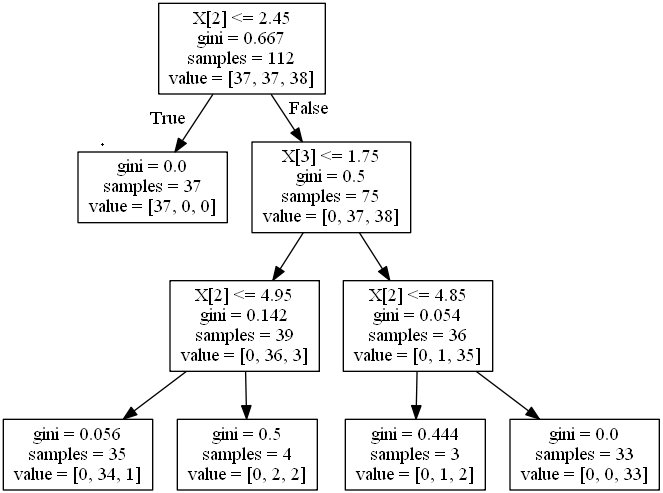